In [1]:
%matplotlib inline

import os
import json
import math
import sys
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
from matplotlib.dates import date2num

notebook_path = !pwd
prj_path = os.path.abspath(os.path.join(notebook_path[0], '../', ''))
sys.path.append(prj_path)
print('Added: %s' % prj_path)

In /Users/lsanchez/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/lsanchez/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/lsanchez/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/lsanchez/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/lsanchez/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in 

Added: /Users/lsanchez/omath_mota_rulo


In [2]:
from omath_mota_rulo.data import capacidad_hospitalaria

In [3]:
data = capacidad_hospitalaria.get()

data = data[~data['estatus_capacidad_uci'].isnull()]

In [4]:
data.head()

,datasetid,recordid,record_timestamp,estatus_capacidad_hospitalaria,fecha,coordenadas,institucion,nombre_hospital,estatus_capacidad_uci,geometry.type,geometry.coordinates,estatus_capacidad_uci_
1265,capacidad-hospitalaria,cbc3d414f11bd6a8dff1fdd8667c01cb8f892e34,2020-11-25T18:21:56.210000+00:00,Crítica,2020-05-01,"[19.290295, -99.160861]",SSA,HOSPITAL GENERAL DR. MANUEL GEA GONZÁLEZ,Crítica,Point,"[-99.160861, 19.290295]",3.0
1266,capacidad-hospitalaria,9da33cf9a2d27a5210cc413f32219f4157083eb8,2020-11-25T18:21:56.210000+00:00,Crítica,2020-05-01,"[19.307226, -99.065356]",SEDESA,BELISARIO DOMINGUEZ,Buena,Point,"[-99.065356, 19.307226]",1.0
1267,capacidad-hospitalaria,96f7fc8ba78089ca67ea85ee919cc1a1523c5a87,2020-11-25T18:21:56.210000+00:00,Crítica,2020-05-01,"[19.361675, -99.224432]",SEDESA,ENRIQUE CABRERA,Buena,Point,"[-99.224432, 19.361675]",1.0
1269,capacidad-hospitalaria,cac316dc7a155b1cff63de6dbc536440d10114e5,2020-11-25T18:21:56.210000+00:00,Buena,2020-05-01,"[19.466549, -99.145102]",IMSS,HOSPITAL DE ESPECIALIDADES 01 CMN SIGLO XXI (C...,Crítica,Point,"[-99.145102, 19.466549]",3.0
1270,capacidad-hospitalaria,dc3a4e5801422891a058679c825dcfff67687a4d,2020-11-25T18:21:56.210000+00:00,Buena,2020-05-01,"[19.395912, -99.16161]",IMSS,HOSPITAL GENERAL DE ZONA 01 CARLOS MC GREGOR (...,Buena,Point,"[-99.16161, 19.395912]",1.0


In [5]:
capacidad = {}
for date, date_data in data.set_index('fecha').groupby(pd.Grouper(freq='D')):
    capacidad[date] = date_data['estatus_capacidad_uci'].value_counts()
    
capacidad = pd.DataFrame(capacidad).T

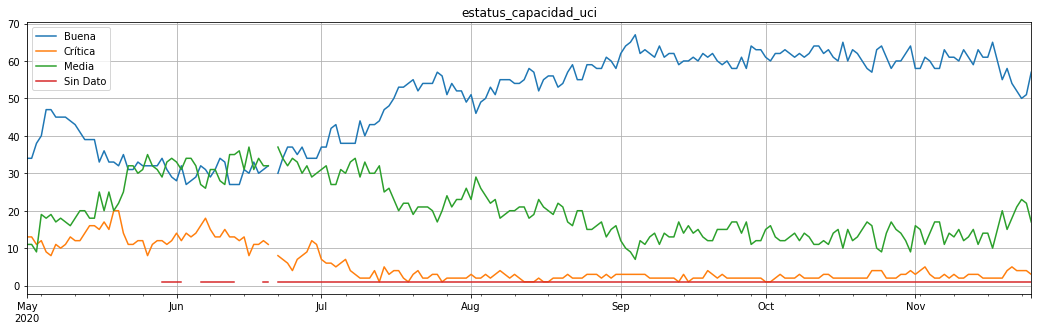

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

capacidad.plot(
    title='estatus_capacidad_uci',
    ax=ax,
    grid=True)

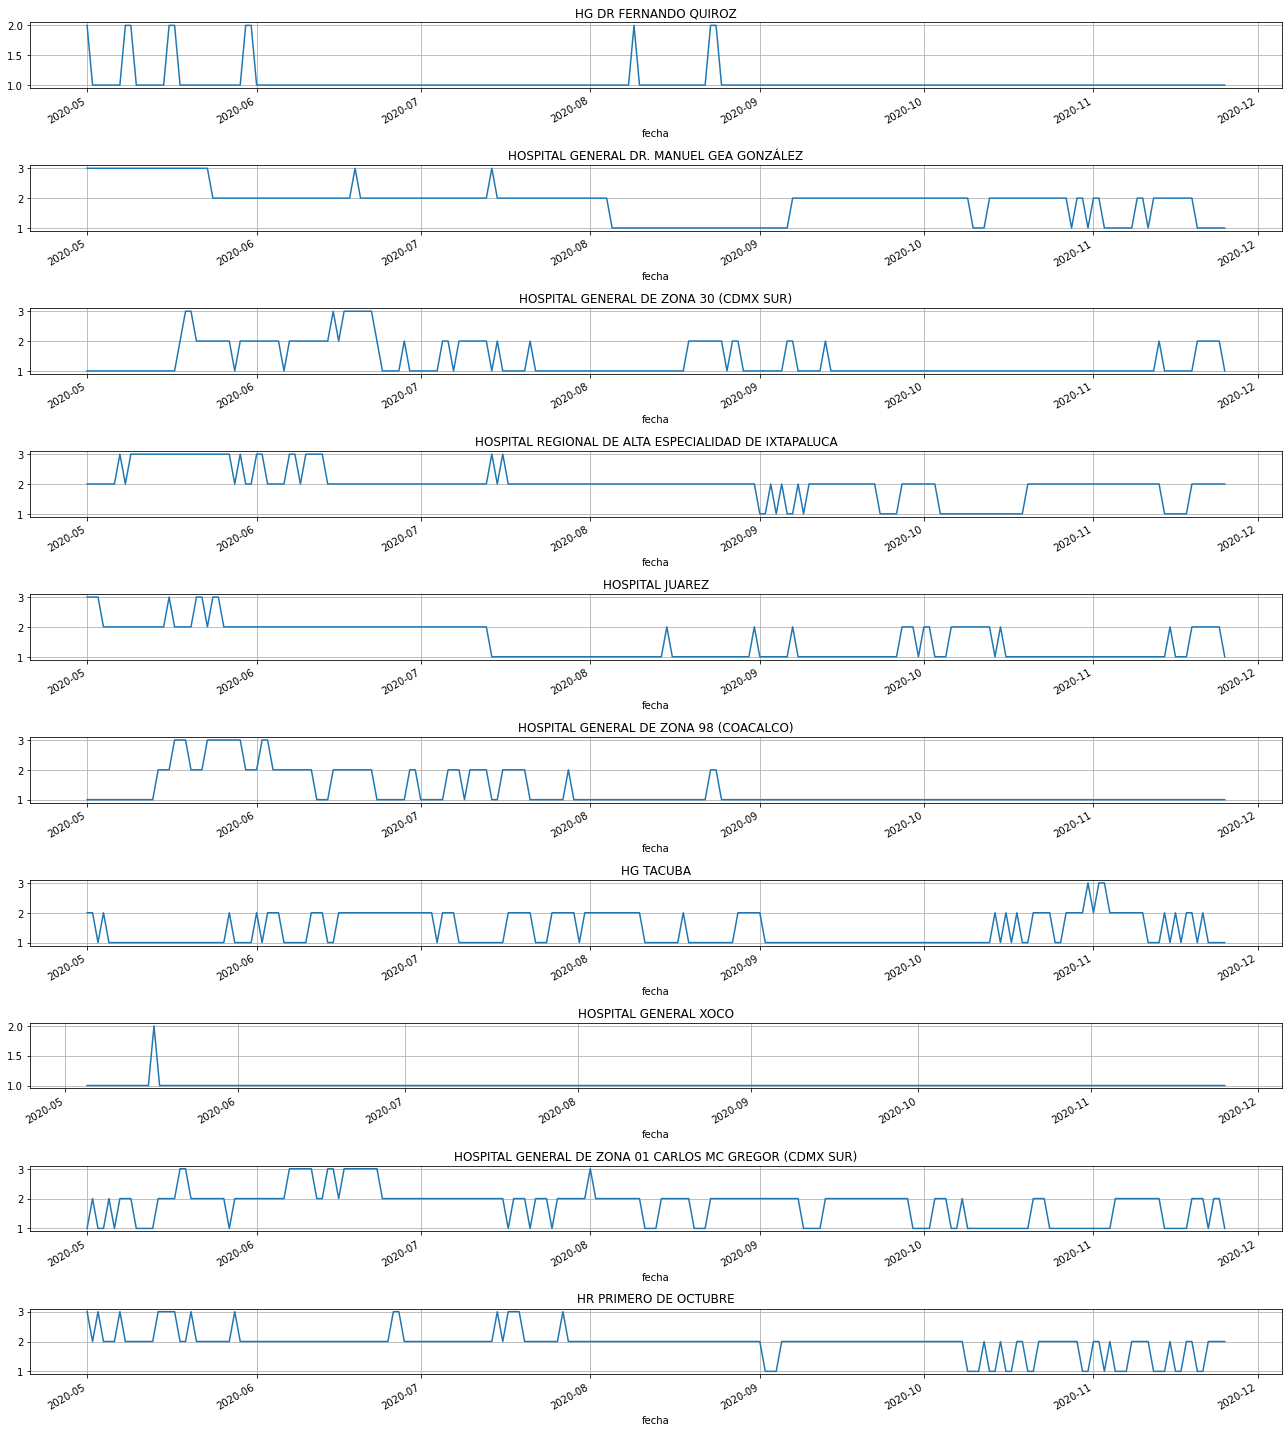

In [17]:
n_samples = 10

sample_hospitals = data[
    'nombre_hospital'
].drop_duplicates().sample(
    n_samples, 
    random_state=42)

fig, ax = plt.subplots(n_samples, 1, figsize=(18, n_samples * 2))

for it, hospital in enumerate(sample_hospitals):
    hospital_data = data[data['nombre_hospital'] == hospital]
    
    hospital_data.set_index('fecha')['estatus_capacidad_uci_'].plot(
        grid=True, 
        ax=ax[it])
    
    ax[it].set_title(hospital)

fig.set_tight_layout('tight')

In [15]:
data.groupby('nombre_hospital')

array(['Crítica', 'Buena', 'Media', 'Sin Dato'], dtype=object)

In [19]:
data['estatus_capacidad_uci'].map({'Buena': 1, 'Media': 2, 'Crítica': 3})

1265     3.0
1266     1.0
1267     1.0
1269     3.0
1270     1.0
        ... 
17355    1.0
17356    2.0
17357    1.0
17358    1.0
17359    1.0
Name: estatus_capacidad_uci, Length: 15960, dtype: float64

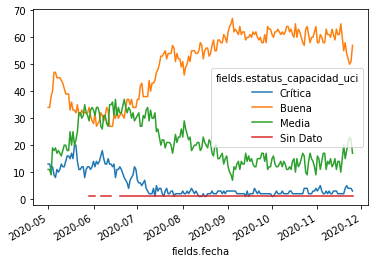

In [26]:
capacidad_hosp.plot()

In [24]:
capacidad_hospital.groupby('nombre_hospital').set_index()

fields.estatus_capacidad_uci,Crítica,Buena,Media,Sin Dato,nombre_hospital
fields.fecha,,,,,
2020-05-01,13.0,34.0,11.0,NaN,H.G.TOLUCA
2020-05-02,13.0,34.0,11.0,NaN,H.G.TOLUCA
2020-05-03,11.0,38.0,9.0,NaN,H.G.TOLUCA
2020-05-04,12.0,40.0,19.0,NaN,H.G.TOLUCA
2020-05-05,9.0,47.0,18.0,NaN,H.G.TOLUCA
...,...,...,...,...,...
2020-11-21,5.0,54.0,18.0,1.0,H.G.TOLUCA
2020-11-22,4.0,52.0,21.0,1.0,H.G.TOLUCA
2020-11-23,4.0,50.0,23.0,1.0,H.G.TOLUCA


In [ ]:
capacidad_hospital.sample(10, random_state=5)